                            OLS Regression Results                            
Dep. Variable:                  partY   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9756
Date:                Fri, 29 May 2020   Prob (F-statistic):              0.433
Time:                        12:39:14   Log-Likelihood:                -159.32
No. Observations:                  40   AIC:                             328.6
Df Residuals:                      35   BIC:                             337.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.6778     28.343      3.517      0.0

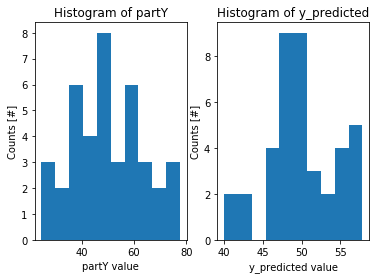

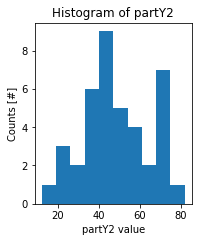

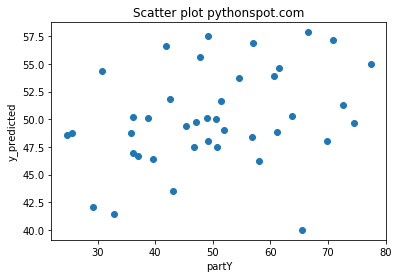

In [16]:
# Load Packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as sp
import matplotlib.pyplot as plt

brainsize = pd.read_csv("brainsize.csv",delimiter=';')
N=len(brainsize)
brainsize.head(N)

# I see some data missing being marked as '.' -> Replace it by NaN
brainsize = brainsize.replace('.', np.nan)

# Add a first random variable partY : partY2=np.random.normal(50,20,N)

partY=[49.16644137,37.03471765,29.22887655,61.20606395,51.96142736,58.10181611,46.7040757,50.58690401,38.74156167,39.55930919,56.93800092,32.79429376,30.85348657,77.48158731,42.65547849,49.04350322,41.89629502,50.6620056,66.57234694,35.81018935,25.60947682,72.57776781,70.91273488,56.78863838,36.19940034,74.61400111,54.49683027,65.54541445,47.70904622,61.47346262,60.57710421,24.65637482,43.12068662,63.84993811,51.41007177,47.10884122,45.42721919,49.14302235,69.89932837,36.22892975]
brainsize['partY'] = partY


# Import
df = brainsize
df.head()

# Train model
model = smf.ols('partY ~ MRI_Count + FSIQ + VIQ + PIQ', data=df).fit()

# Extract coefficients from the multilinear model
print(model.summary())

y_predicted = np.asarray(-5.372e-05*brainsize['MRI_Count']+0.7772*brainsize['FSIQ']-0.3567*brainsize['VIQ']-0.4400*brainsize['PIQ']+99.6778)

# Pearson's correlation coefficient
r, p = sp.stats.pearsonr(y_predicted,partY)
print("Pearson's r [PartY] = ",r)
print("p-value [PartY] = ",p)

# Add a second random variable partY2 : partY2=np.random.normal(50,20,N)

partY2=[49.95969367,27.98988465,40.6969478,66.84422947,21.89712288,46.28770742,68.7440651,50.73995944,50.94500417,29.19459461,47.09900811,45.84432981,39.34383394,19.2493662,74.01498786,59.58219786,69.18273254,38.39913085,36.91416637,33.85480659,41.78321472,70.05555154,71.81046433,12.24348989,46.54292554,64.52592382,38.68515676,46.47969269,24.71271463,40.72674837,69.5371685,82.02633955,73.30074217,36.05179964,44.31815509,59.8466495,60.3448255,54.4307475,48.2810806,50.63390224]
brainsize['partY2'] = partY2

r2, p2 = sp.stats.pearsonr(y_predicted,partY2)
print("Pearson's r [PartY2] = ",r2)
print("p-value [PartY2] = ",p2)

plt.figure(1)
plt.subplot(1,2,1)
plt.hist(partY)
plt.xlabel("partY value")
plt.ylabel("Counts [#]")
plt.title("Histogram of partY")
plt.subplot(1,2,2)
plt.hist(y_predicted)
plt.xlabel("y_predicted value")
plt.ylabel("Counts [#]")
plt.title("Histogram of y_predicted")
plt.figure(2)
plt.subplot(1,2,1)
plt.hist(partY2)
plt.xlabel("partY2 value")
plt.ylabel("Counts [#]")
plt.title("Histogram of partY2")
plt.tight_layout(pad=3.0)
plt.figure(3)
plt.scatter(partY, y_predicted)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('partY')
plt.ylabel('y_predicted')
plt.show()